In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def cv2_imshow(img):
    image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.axis('off')  # Hide axis
    plt.show()

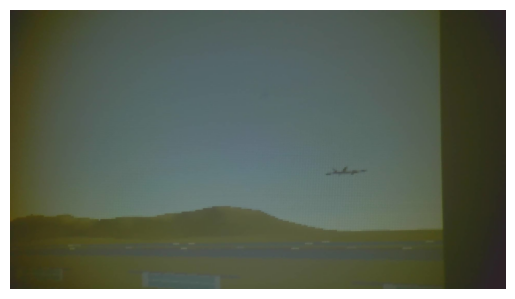

In [208]:
# Capture video from the webcam or a video file
frame = cv2.imread("Images//mau 2//Image28.jpg")  # Change to the video file path if needed
cv2_imshow(frame)

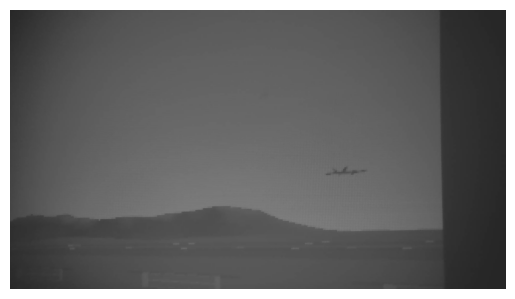

In [209]:
# Convert frame to grayscale (template matching works on grayscale images)
gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
# _, gray_frame = cv2.threshold(gray_frame, 85, 255, cv2.THRESH_BINARY)
cv2_imshow(gray_frame)

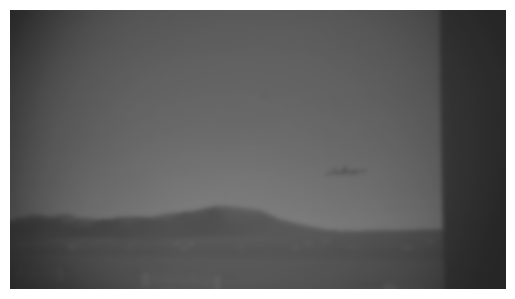

In [210]:
# Apply GaussianBlur to reduce noise and improve contour detection
blurred = cv2.GaussianBlur(gray_frame, (51, 51), 0)
cv2_imshow(blurred)

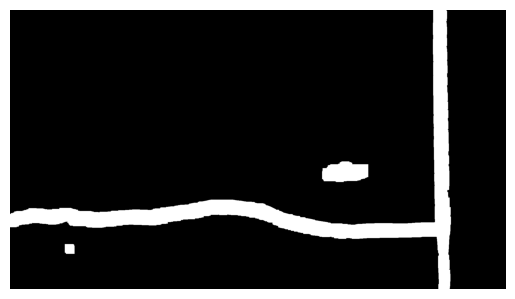

In [211]:
# Apply edge detection (Canny or similar method)
edges = cv2.Canny(blurred, 5, 7)
# Define the kernel (structuring element)
kernel = np.ones((30, 30), np.uint8)  # You can adjust the kernel size (5, 5) for different effects
# Apply the dilation operation
edges = cv2.dilate(edges, kernel, iterations=1)  # 'iterations' determines how much the dilation is applied
cv2_imshow(edges)

In [212]:
# Find contours in the edged image
contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
len(contours)

3

14320
2.2375


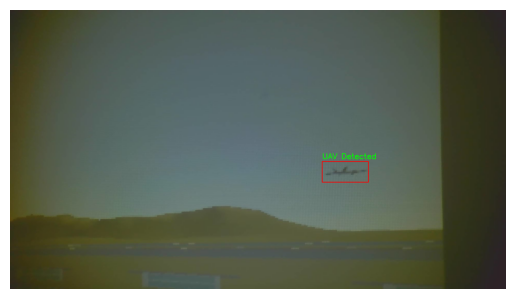

In [213]:
output_frame = frame.copy()
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    area = w*h
    if 2000 < area < 15000:  # Adjust these thresholds based on your UAV size
        # Calculate aspect ratio (width/height) to ensure it matches the UAV shape
        aspect_ratio = float(w) / h
        print(area)
        print(aspect_ratio)
        if 1.3 < aspect_ratio < 4:  # Adjust based on your UAV shape
            cv2.rectangle(output_frame, (x, y), (x + w, y + h), (0, 0, 255), 2)
            cv2.putText(output_frame, "UAV Detected", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
# Display the result
cv2_imshow(output_frame)